In [2]:
'''IMPORTANT NOTE: When answering the below questions, you would require to reshape the data i.e., 
convert from wide to long and long to wide (with stack(), unstack() and pivot()) after aggregating it by using groupby(). 
Please refer to the material at Pandas – Data Understanding.ipynb for details.'''

'IMPORTANT NOTE: When answering the below questions, you would require to reshape the data i.e., \nconvert from wide to long and long to wide (with stack(), unstack() and pivot()) after aggregating it by using groupby(). \nPlease refer to the material at Pandas – Data Understanding.ipynb for details.'

In [4]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
file_path = 'C://Projects_python//Project//Case Study//WIP//Case Study 4 - Python Visualizations Case Study//'
file_name = 'SalesData.csv'

In [6]:
sales = pd.read_csv(file_path+file_name)

In [7]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [11]:
sales.size

51926

In [12]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [3]:
# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [13]:
sales_region =sales.groupby('Region')['Sales2015','Sales2016'].sum()
sales_region

C:\Users\pauld\AppData\Local\Temp\ipykernel_2856\1732675521.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_region =sales.groupby('Region')['Sales2015','Sales2016'].sum()


,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


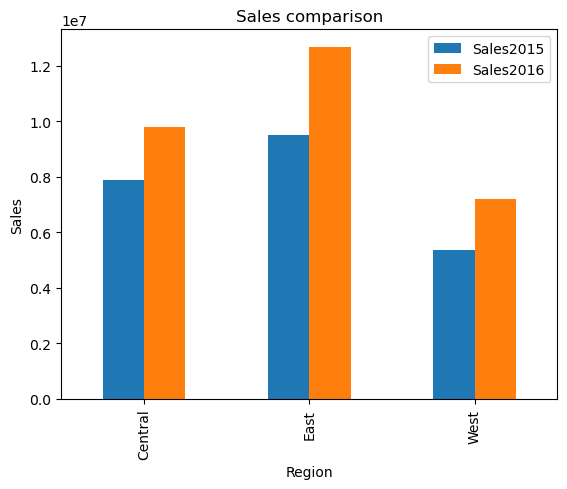

In [15]:
sales_region.plot(kind = 'bar')
plt.title('Sales comparison')
plt.ylabel('Sales')
plt.show()

In [16]:
# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [20]:
sales_region_2016 = sales.groupby('Region')['Sales2016'].sum()

In [21]:
sales_region_2016

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

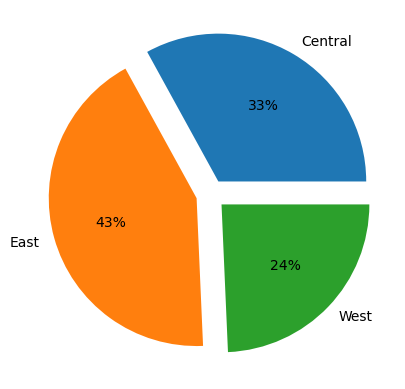

In [36]:
plt.pie(x= sales_region_2016, autopct= '%1.0f%%', labels= ['Central','East','West'], explode=[0.1,0.1,0.1])
plt.show()

In [37]:
# 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [38]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [41]:
sales_region_tier = sales[['Region', 'Tier', 'Sales2015', 'Sales2016']]

In [44]:
sales_region_tier = sales_region_tier.groupby(['Region', 'Tier'])['Sales2015', 'Sales2016'].sum()

C:\Users\pauld\AppData\Local\Temp\ipykernel_2856\1434452819.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_region_tier = sales_region_tier.groupby(['Region', 'Tier'])['Sales2015', 'Sales2016'].sum()


In [45]:
sales_region_tier.head()

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06

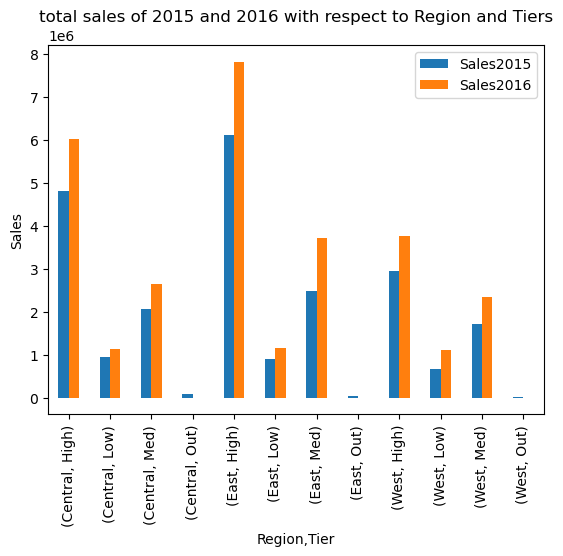

In [47]:
sales_region_tier.plot(kind= 'bar')
plt.ylabel('Sales')
plt.title('total sales of 2015 and 2016 with respect to Region and Tiers')
plt.show()

In [48]:
# 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [52]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [72]:
sales_east = sales.loc[sales.Region == 'East', :]

In [73]:
sales_east.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99


In [76]:
sales_east = sales_east.groupby('State')['Sales2015','Sales2016'].sum()

C:\Users\pauld\AppData\Local\Temp\ipykernel_2856\4000271132.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_east = sales_east.groupby('State')['Sales2015','Sales2016'].sum()


<Axes: xlabel='State'>

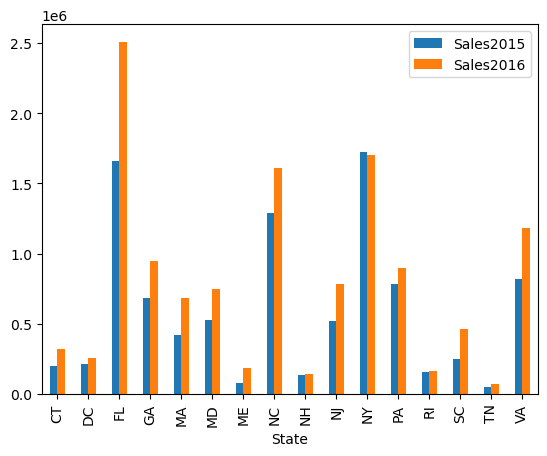

In [77]:
sales_east.plot(kind = 'bar')

In [78]:
sales_east.loc[sales_east.Sales2015>sales_east.Sales2016,:]

,Sales2015,Sales2016
State,,
NY,1725415.065,1703135.8


In [79]:
# state NY shows a negative sales compared to previous year of 2015.

In [80]:
# 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [81]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [84]:
high_tier_sales = sales.loc[sales.Tier == 'High']

In [85]:
high_tier_sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54
10,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Feb,9640.17,27316.66,3.0,10.0,1.06,1.08
17,2426,Account13,East,BIG APPLE,PATERSON,NJ,High,Oct,0.00,3128.34,0.0,1.0,1.42,1.23


In [88]:
high_tier_sales = high_tier_sales.groupby('Division')['Units2015', 'Units2016'].sum()

C:\Users\pauld\AppData\Local\Temp\ipykernel_2856\1227523227.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  high_tier_sales = high_tier_sales.groupby('Division')['Units2015', 'Units2016'].sum()


In [89]:
high_tier_sales.loc[high_tier_sales.Units2015>high_tier_sales.Units2016,:]

,Units2015,Units2016
Division,,


<Axes: xlabel='Division'>

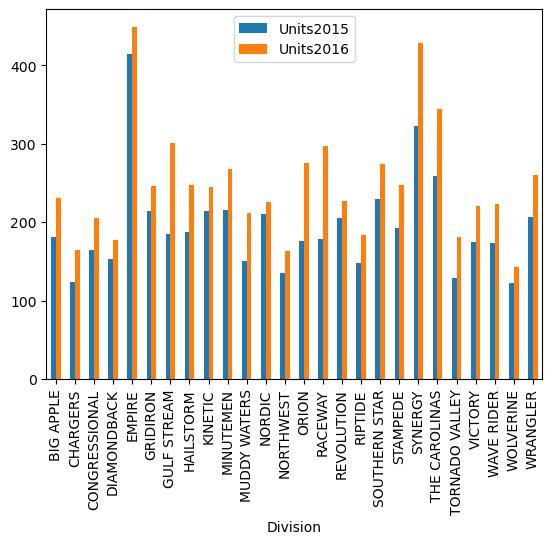

In [90]:
high_tier_sales.plot(kind = 'bar')

In [91]:
# None of the divions in high tier places show a negtive quantities sold.

In [92]:
'''6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset.
The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4'''

'6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset.\nThe Quarters are based on months and defined as -\n• Jan - Mar : Q1\n• Apr - Jun : Q2\n• Jul - Sep : Q3\n• Oct - Dec : Q4'

In [93]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [96]:
month = sales.Month

In [97]:
qtr = []
for x in month:
    if x in ['Jan', 'Feb', 'Mar']:
        qtr.append('Q1')
    elif x in ['Apr', 'May', 'Jun']:
        qtr.append('Q2')
    elif x in ['Jul', 'Aug', 'Sep']:
        qtr.append('Q3')
    else:
        qtr.append('Q4')

In [100]:
qtr

['Q3',
 'Q4',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q4',
 'Q2',
 'Q2',
 'Q2',
 'Q4',
 'Q4',
 'Q1',
 'Q2',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q4',
 'Q4',
 'Q4',
 'Q1',
 'Q1',
 'Q2',
 'Q2',
 'Q2',
 'Q1',
 'Q4',
 'Q3',
 'Q4',
 'Q1',
 'Q1',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q2',
 'Q3',
 'Q3',
 'Q4',
 'Q3',
 'Q1',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q1',
 'Q3',
 'Q1',
 'Q3',
 'Q2',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q2',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q2',
 'Q4',
 'Q3',
 'Q4',
 'Q3',
 'Q2',
 'Q3',
 'Q1',
 'Q3',
 'Q4',
 'Q4',
 'Q2',
 'Q3',
 'Q2',
 'Q4',
 'Q1',
 'Q1',
 'Q4',
 'Q1',
 'Q2',
 'Q1',
 'Q2',
 'Q4',
 'Q4',
 'Q3',
 'Q1',
 'Q1',
 'Q1',
 'Q3',
 'Q3',
 'Q2',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q4',
 'Q2',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q3',
 'Q4',
 'Q4',
 'Q4',
 'Q2',
 'Q1',
 'Q4',
 'Q1',
 'Q3',
 'Q3',
 'Q1',
 'Q4',
 'Q3',
 'Q2',
 'Q1',
 'Q1',
 'Q2',

In [101]:
sales['Qtr'] = qtr

In [102]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [103]:
# 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [107]:
quarter_sales = sales.groupby('Qtr')['Sales2015', 'Sales2016'].sum()

C:\Users\pauld\AppData\Local\Temp\ipykernel_2856\2231620259.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  quarter_sales = sales.groupby('Qtr')['Sales2015', 'Sales2016'].sum()


<Axes: xlabel='Qtr'>

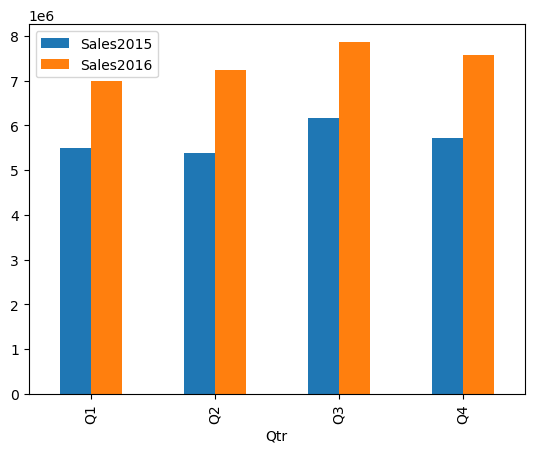

In [108]:
quarter_sales.plot(kind = 'bar')

In [109]:
# 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [111]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


In [130]:
qtr_tier = sales.pivot_table(index='Qtr', columns= 'Tier', values = ['Sales2015', 'Sales2016'])

In [131]:
qtr_tier

Sales2015                                           Sales2016  \
Tier         High          Low          Med          Out         High   
Qtr                                                                     
Q1    6826.412330  4071.556279  5132.410239  2986.395000  7974.677515   
Q2    6690.994100  4026.532260  5882.916623  6327.750000  8752.018136   
Q3    7511.026312  3930.063767  6035.217803  5790.046667  9334.404693   
Q4    6844.987881  3601.201701  6729.667768  4798.971250  9386.142545   

                                            
Tier          Low          Med         Out  
Qtr                                         
Q1    5516.469593  7654.041681    0.000000  
Q2    5031.608757  8758.157542    0.000000  
Q3    5446.422671  8197.976091 -360.947778  
Q4    5052.104694  8307.596804    0.000000

In [132]:
qtr_tier.plot(kind = 'pie', subplots=True)

ValueError: pie plot doesn't allow negative values

In [133]:
qtr_tier.columns

MultiIndex([('Sales2015', 'High'),
            ('Sales2015',  'Low'),
            ('Sales2015',  'Med'),
            ('Sales2015',  'Out'),
            ('Sales2016', 'High'),
            ('Sales2016',  'Low'),
            ('Sales2016',  'Med'),
            ('Sales2016',  'Out')],
           names=[None, 'Tier'])

In [134]:
qtr_tier

Sales2015                                           Sales2016  \
Tier         High          Low          Med          Out         High   
Qtr                                                                     
Q1    6826.412330  4071.556279  5132.410239  2986.395000  7974.677515   
Q2    6690.994100  4026.532260  5882.916623  6327.750000  8752.018136   
Q3    7511.026312  3930.063767  6035.217803  5790.046667  9334.404693   
Q4    6844.987881  3601.201701  6729.667768  4798.971250  9386.142545   

                                            
Tier          Low          Med         Out  
Qtr                                         
Q1    5516.469593  7654.041681    0.000000  
Q2    5031.608757  8758.157542    0.000000  
Q3    5446.422671  8197.976091 -360.947778  
Q4    5052.104694  8307.596804    0.000000

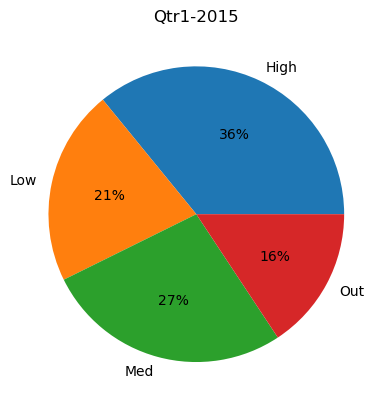

In [143]:
plt.pie(x=qtr_tier.loc["Q1",'Sales2015'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr1-2015')
plt.show()

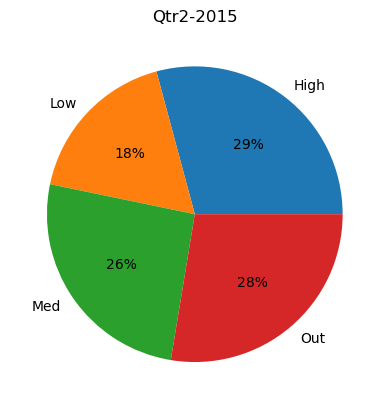

In [144]:
plt.pie(x=qtr_tier.loc["Q2",'Sales2015'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr2-2015')
plt.show()

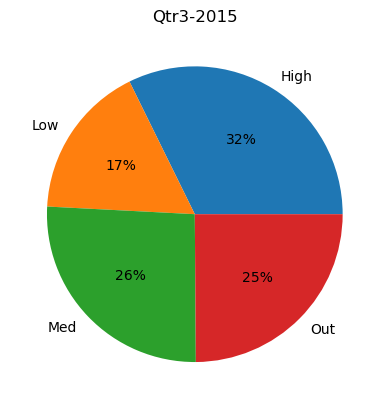

In [145]:
plt.pie(x=qtr_tier.loc["Q3",'Sales2015'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr3-2015')
plt.show()

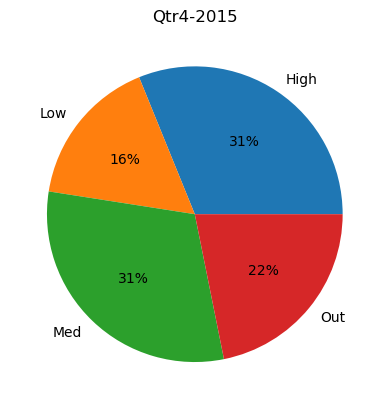

In [146]:
plt.pie(x=qtr_tier.loc["Q4",'Sales2015'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr4-2015')
plt.show()

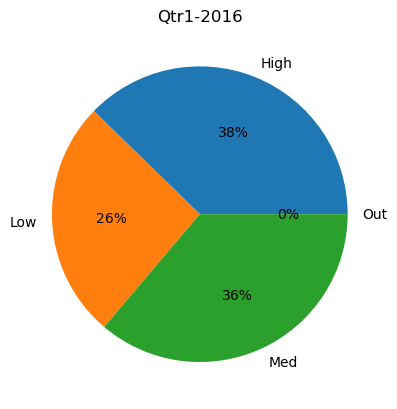

In [147]:
plt.pie(x=qtr_tier.loc["Q1",'Sales2016'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr1-2016')
plt.show()

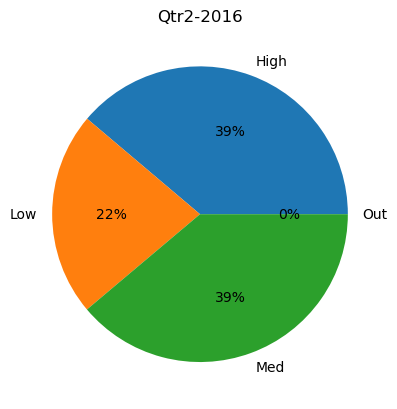

In [148]:
plt.pie(x=qtr_tier.loc["Q2",'Sales2016'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr2-2016')
plt.show()

ValueError: Wedge sizes 'x' must be non negative values

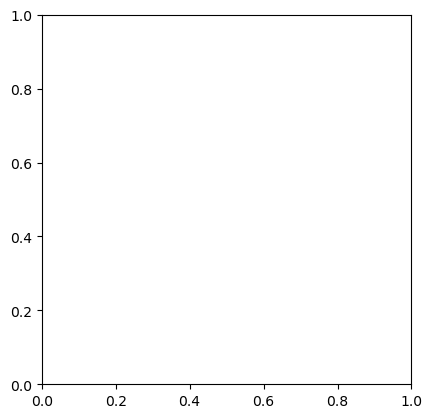

In [149]:
plt.pie(x=qtr_tier.loc["Q3",'Sales2016'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr3-2016')
plt.show()

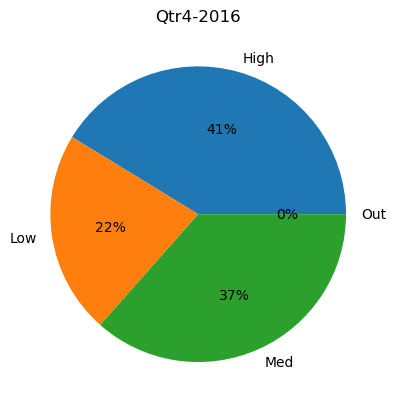

In [151]:
plt.pie(x=qtr_tier.loc["Q4",'Sales2016'],autopct='%1.0f%%', labels= ['High','Low', 'Med','Out'])
plt.title('Qtr4-2016')
plt.show()